In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv
import glob


from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Multiple Linear Regression

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

In [2]:
# Store filepath in a variable
myData = "data/Combined_Data_Base_PN.csv"
myData_df = pd.read_csv(myData, encoding="ISO-8859-1")
#myData_df.dtypes
myData_df.head()
#myData_df.tail()

,date,recession,gdp_change,median_house,gold_price,dow_open,fed_rate,InvYield_10yr_5yr,unemp_rate,earnings_chg,cpi,inflation,housing_starts
0,1/1/63,0,3.6,17200,35.06,649.3,3.0,0.29,5.7,87,30.4,0.00,1244
1,2/1/63,0,3.6,17700,35.08,652.1,3.0,0.22,5.9,115,30.4,0.00,1456
2,3/1/63,0,3.6,18200,35.10,682.9,3.0,0.26,5.7,90,30.5,0.33,1534
3,4/1/63,0,3.8,18200,35.10,662.9,3.0,0.25,5.7,260,30.5,0.00,1689
4,5/1/63,0,3.8,17500,35.08,682.5,3.0,0.22,5.9,36,30.5,0.00,1641


In [3]:
cols= ['median_house','gold_price','dow_open','fed_rate','InvYield_10yr_5yr','unemp_rate','cpi','earnings_chg',
       'inflation','housing_starts']
# 'gdp_change',


X=myData_df[cols]
y=myData_df['gdp_change']
X.head()

,median_house,gold_price,dow_open,fed_rate,InvYield_10yr_5yr,unemp_rate,cpi,earnings_chg,inflation,housing_starts
0,17200,35.06,649.3,3.0,0.29,5.7,30.4,87,0.00,1244
1,17700,35.08,652.1,3.0,0.22,5.9,30.4,115,0.00,1456
2,18200,35.10,682.9,3.0,0.26,5.7,30.5,90,0.33,1534
3,18200,35.10,662.9,3.0,0.25,5.7,30.5,260,0.00,1689
4,17500,35.08,682.5,3.0,0.22,5.9,30.5,36,0.00,1641


In [4]:
# Create a linear model
model = LinearRegression()

#Fitting our model with all of our features in X
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5849956314387914


In [6]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 3.6
Predicted output: 3.420880971163969
Prediction Error: -0.17911902883603092


In [7]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,3.420881,3.6,-0.179119
1,3.817597,3.6,0.217597
2,3.650317,3.6,0.050317
3,5.042064,3.8,1.242064
4,3.655870,3.8,-0.144130
5,3.484233,3.8,-0.315767
6,4.039976,4.8,-0.760024
7,4.200364,4.8,-0.599636
8,4.643829,4.8,-0.156171
9,4.692242,5.2,-0.507758


In [8]:

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2.027510840793502
R-squared (R2 ): 0.5849956314387914


## Residuals

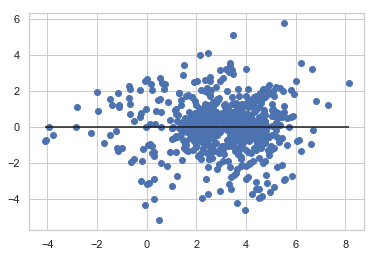

In [9]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.

## Your Turn!

In [10]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(y,X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_change   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     373.9
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          3.53e-266
Time:                        13:01:55   Log-Likelihood:                -1220.5
No. Observations:                 679   AIC:                             2461.
Df Residuals:                     669   BIC:                             2506.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
median_house      -2.419e-05   4.98e-0

In [11]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 3.6
Predicted output: 3.420880971163969
Prediction Error: -0.17911902883603092


In [12]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,3.420881,3.6,-0.179119
1,3.817597,3.6,0.217597
2,3.650317,3.6,0.050317
3,5.042064,3.8,1.242064
4,3.655870,3.8,-0.144130
5,3.484233,3.8,-0.315767
6,4.039976,4.8,-0.760024
7,4.200364,4.8,-0.599636
8,4.643829,4.8,-0.156171
9,4.692242,5.2,-0.507758
